### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import json
import sqlite3
import re


In [3]:
database = sqlite3.connect('database.sqlite')
categories = pd.read_sql_query("SELECT * FROM categories", database)
podcasts = pd.read_sql_query("SELECT * FROM podcasts", database)
reviews = pd.read_sql_query("SELECT * FROM reviews", database)

In [4]:
print(categories.head())

                         podcast_id              category
0  c61aa81c9b929a66f0c1db6cbe5d8548                  arts
1  c61aa81c9b929a66f0c1db6cbe5d8548  arts-performing-arts
2  c61aa81c9b929a66f0c1db6cbe5d8548                 music
3  ad4f2bf69c72b8db75978423c25f379e                  arts
4  ad4f2bf69c72b8db75978423c25f379e           arts-design


In [5]:
print(podcasts.head())

                         podcast_id   itunes_id  \
0  a00018b54eb342567c94dacfb2a3e504  1313466221   
1  a00043d34e734b09246d17dc5d56f63c   158973461   
2  a0004b1ef445af9dc84dad1e7821b1e3   139076942   
3  a00071f9aaae9ac725c3a586701abf4d  1332508972   
4  a000a500f06555f81220c3eb641aded7  1544900779   

                                    slug  \
0                         scaling-global   
1  cornerstone-baptist-church-of-orlando   
2            mystery-dancing-in-the-dark   
3                      kts-money-matters   
4       word-on-the-street-w-dreak-swift   

                                          itunes_url  \
0  https://podcasts.apple.com/us/podcast/scaling-...   
1  https://podcasts.apple.com/us/podcast/cornerst...   
2  https://podcasts.apple.com/us/podcast/mystery-...   
3  https://podcasts.apple.com/us/podcast/kts-mone...   
4  https://podcasts.apple.com/us/podcast/word-on-...   

                                   title  
0                         Scaling Global  
1  Co

In [6]:
print(reviews.head())

                         podcast_id  \
0  c61aa81c9b929a66f0c1db6cbe5d8548   
1  c61aa81c9b929a66f0c1db6cbe5d8548   
2  ad4f2bf69c72b8db75978423c25f379e   
3  ad4f2bf69c72b8db75978423c25f379e   
4  ad4f2bf69c72b8db75978423c25f379e   

                                              title  \
0                               really interesting!   
1  Must listen for anyone interested in the arts!!!   
2                                 nauseatingly left   
3                                   Diverse stories   
4                                              👍👍👍👍   

                                             content  rating        author_id  \
0  Thanks for providing these insights.  Really e...       5  F7E5A318989779D   
1  Super excited to see this podcast grow. So man...       5  F6BF5472689BD12   
2  I'm a liberal myself, but its pretty obvious a...       1  1AB95B8E6E1309E   
3  I find Tedx talks very inspirational but I oft...       5  11BB760AA5DEBD1   
4                I love this 

In [7]:
data = pd.merge(reviews, podcasts, on='podcast_id', how='left')
data = pd.merge(data, categories, on='podcast_id', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553715 entries, 0 to 4553714
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   podcast_id  object 
 1   title_x     object 
 2   content     object 
 3   rating      int64  
 4   author_id   object 
 5   created_at  object 
 6   itunes_id   float64
 7   slug        object 
 8   itunes_url  object 
 9   title_y     object 
 10  category    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 382.2+ MB


In [8]:
podcasts_list = []
with open('podcasts.json', 'r', encoding='utf-8') as f:
    for line in f:
        podcasts_list.append(json.loads(line))
podcasts_json = pd.DataFrame(podcasts_list)
print(podcasts_json.head())

                         podcast_id   itunes_id  \
0  d3997f1089be9e45fda4113be39765cb  1000000618   
1  f201172864310534ae6b6c4f8ae9b8cc  1000016089   
2  4e5ce6a47e5d491aac3f588cfb3ece73  1000016800   
3  6c476d3dd90c3fe5381153354b326952  1000035657   
4  b9e7fdf5cd545fc8097055e2f2f1d760  1000035702   

                                  slug  \
0   christianity-questions-and-answers   
1                  rahdo-talks-through   
2  st-neots-evangelical-church-sermons   
3                       idiotspeakshow   
4              conciertos-en-el-living   

                                          itunes_url                title  \
0  https://podcasts.apple.com/us/podcast/christia...                 None   
1  https://podcasts.apple.com/us/podcast/rahdo-ta...  Rahdo Talks Through   
2  https://podcasts.apple.com/us/podcast/st-neots...                 None   
3  https://podcasts.apple.com/us/podcast/idiotspe...       IdiotSpeakShow   
4  https://podcasts.apple.com/us/podcast/conciert...   

In [9]:
data['itunes_id'] = data['itunes_id'].fillna(0).astype('int64').astype(str)
podcasts_json['itunes_id'] = podcasts_json['itunes_id'].fillna(0).astype('int64').astype(str)
podcasts_desc_clean = podcasts_json[['itunes_id', 'description']].copy()
data = pd.merge(data, podcasts_desc_clean, on='itunes_id', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553715 entries, 0 to 4553714
Data columns (total 12 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   podcast_id   object
 1   title_x      object
 2   content      object
 3   rating       int64 
 4   author_id    object
 5   created_at   object
 6   itunes_id    object
 7   slug         object
 8   itunes_url   object
 9   title_y      object
 10  category     object
 11  description  object
dtypes: int64(1), object(11)
memory usage: 416.9+ MB


In [10]:
data.head()

,podcast_id,title_x,content,rating,author_id,created_at,itunes_id,slug,itunes_url,title_y,category,description
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts,Backstage at Tilles Center provides listeners ...
1,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts-performing-arts,Backstage at Tilles Center provides listeners ...
2,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,music,Backstage at Tilles Center provides listeners ...
3,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts,Backstage at Tilles Center provides listeners ...
4,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,1373261997,backstage-at-tilles-center,https://podcasts.apple.com/us/podcast/backstag...,Backstage at Tilles Center,arts-performing-arts,Backstage at Tilles Center provides listeners ...


In [11]:
unique_users = data['author_id'].nunique()
unique_podcasts = data['podcast_id'].nunique()
interactions = len(data)
sparsity  = 1 - (interactions / (unique_users * unique_podcasts))
sparsity *= 100
print(f'Unique users: {unique_users}, Unique podcasts: {unique_podcasts}')
print(f'Total interactions: {interactions}')
print(f'Sparsity: {sparsity:.4f} %')

Unique users: 1475285, Unique podcasts: 111544
Total interactions: 4553715
Sparsity: 99.9972 %


In [12]:
# missing values check
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values.sort_values(ascending=False))

Missing values in each column:
description    2572621
slug             24232
itunes_url       24232
title_y          24232
category         24232
podcast_id           0
title_x              0
content              0
rating               0
author_id            0
created_at           0
itunes_id            0
dtype: int64


In [13]:
data = data.dropna()

In [14]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values.sort_values(ascending=False))

Missing values in each column:
podcast_id     0
title_x        0
content        0
rating         0
author_id      0
created_at     0
itunes_id      0
slug           0
itunes_url     0
title_y        0
category       0
description    0
dtype: int64


In [15]:
data['desc_len'] = data['description'].str.len()
print(data['desc_len'].describe().round(2))

count    1981094.00
mean         402.78
std          298.33
min            1.00
25%          217.00
50%          328.00
75%          508.00
max         3883.00
Name: desc_len, dtype: float64


In [16]:
def english_only(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [17]:

def looks_english(text, min_ratio=0.8):
    ascii_chars = re.findall(r'[A-Za-z ]', text)
    return len(ascii_chars) / max(len(text), 1) >= min_ratio

data = data[
    (data['desc_len'] > 50) &
    data['description'].apply(looks_english)
].copy()

print(data['desc_len'].describe().round(2))


count    1952969.00
mean         407.99
std          297.21
min           51.00
25%          220.00
50%          330.00
75%          509.00
max         3883.00
Name: desc_len, dtype: float64


In [18]:
print(data['description'].head())

0    Backstage at Tilles Center provides listeners ...
1    Backstage at Tilles Center provides listeners ...
2    Backstage at Tilles Center provides listeners ...
3    Backstage at Tilles Center provides listeners ...
4    Backstage at Tilles Center provides listeners ...
Name: description, dtype: object


In [19]:
unique_users = data['author_id'].nunique()
unique_podcasts = data['podcast_id'].nunique()
interactions = len(data)
sparsity  = 1 - (interactions / (unique_users * unique_podcasts))
sparsity *= 100
print(f'Unique users: {unique_users}, Unique podcasts: {unique_podcasts}')
print(f'Total interactions: {interactions}')
print(f'Sparsity: {sparsity:.4f} %')

Unique users: 637665, Unique podcasts: 16826
Total interactions: 1952969
Sparsity: 99.9818 %


In [20]:
min_rating = data['rating'].min()
max_rating = data['rating'].max()
print('Rating statistics:')
print('Min rating:',min_rating)
print('Max rating:', max_rating)
print("Median rating:", data['rating'].median())
print("Mean rating:", data['rating'].mean())
print(data['rating'].describe().round(2))

Rating statistics:
Min rating: 1
Max rating: 5
Median rating: 5.0
Mean rating: 4.560027834543201
count    1952969.00
mean           4.56
std            1.12
min            1.00
25%            5.00
50%            5.00
75%            5.00
max            5.00
Name: rating, dtype: float64


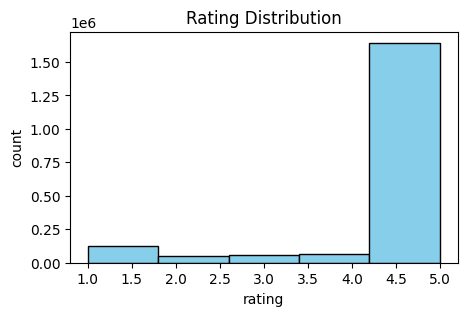

In [21]:
data['rating'] = data['rating'].round().astype(int)
plt.figure(figsize=(5,3))
plt.hist(data['rating'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('rating')
plt.ylabel('count')
plt.title('Rating Distribution')
plt.show()

In [22]:
user_act = data.groupby('author_id').size()
podcast_pop = data.groupby('itunes_id').size()

print(f"\nUser Activity (interactions per user):")
print(f"  Mean: {user_act.mean():.1f}")
print(f"  Median: {user_act.median():.1f}")
print(f"  Min: {user_act.min()}")
print(f"  Max: {user_act.max()}")
print(f"  Users with only 1 interaction: {(user_act == 1).sum()},  {(user_act == 1).sum() / len(user_act) * 100:.2f}%")
print(f"\nPodcast Popularity (interactions per podcast):")
print(f"  Mean: {podcast_pop.mean():.1f}")
print(f"  Median: {podcast_pop.median():.1f}")
print(f"  Min: {podcast_pop.min()}")
print(f"  Max: {podcast_pop.max()}")
print(f"  Podcasts with only 1 interaction: {(podcast_pop == 1).sum()},  {(podcast_pop == 1).sum() / len(podcast_pop) * 100:.2f}%")


User Activity (interactions per user):
  Mean: 3.1
  Median: 2.0
  Min: 1
  Max: 1079
  Users with only 1 interaction: 130142,  20.41%

Podcast Popularity (interactions per podcast):
  Mean: 116.1
  Median: 10.0
  Min: 1
  Max: 33104
  Podcasts with only 1 interaction: 1222,  7.26%


In [23]:
user_top20 = int(len(user_act) * 0.2)
podcast_top20 = int(len(podcast_pop) * 0.2)

user_top20_prc = user_act.sort_values(ascending=False).head(user_top20).sum() / user_act.sum() * 100
podcast_top20_prc = podcast_pop.sort_values(ascending=False).head(podcast_top20).sum() / podcast_pop.sum() * 100

print(f"Top 20% most active users contribute to {user_top20_prc:.2f}% total interactions.")
print(f"Top 20% most popular podcasts contribute to {podcast_top20_prc:.2f}% total interactions.")

Top 20% most active users contribute to 43.07% total interactions.
Top 20% most popular podcasts contribute to 92.03% total interactions.


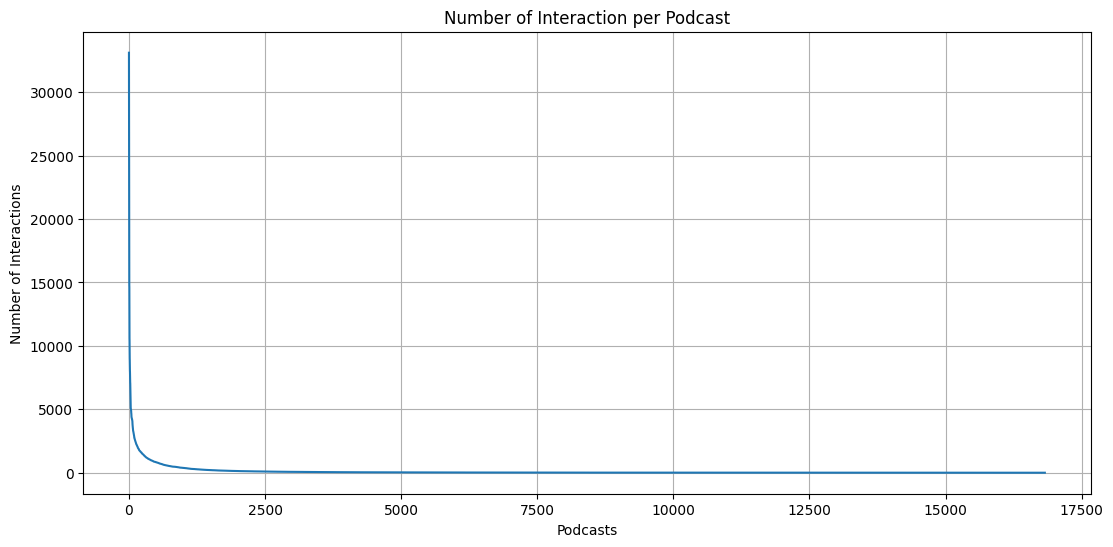

In [24]:
ordered_pop = podcast_pop.sort_values(ascending= False)

plt.figure(figsize=(13,6))
plt.plot(ordered_pop.values)
plt.title('Number of Interaction per Podcast')
plt.xlabel('Podcasts')
plt.ylabel('Number of Interactions')
plt.grid(True)
plt.show()

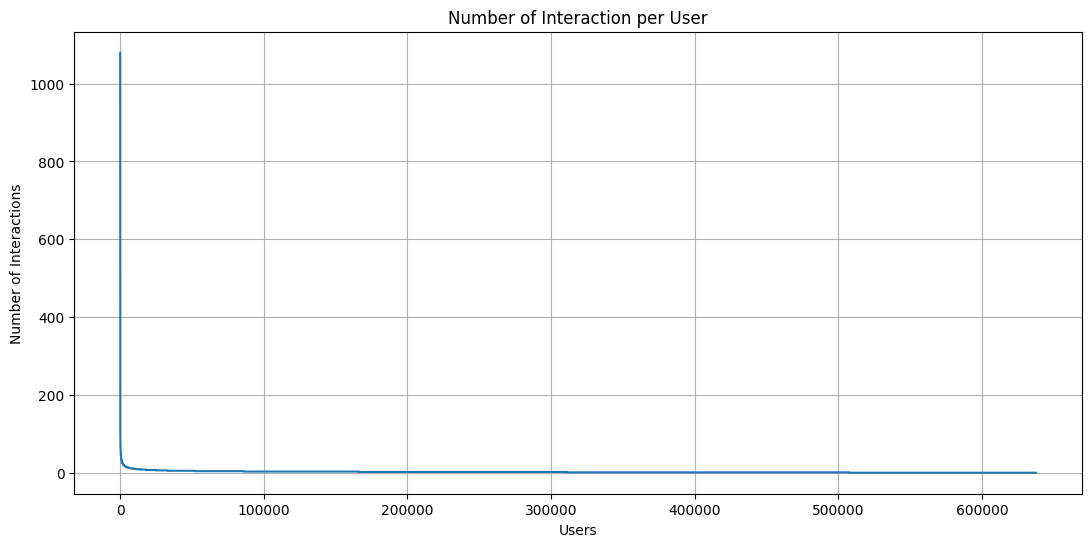

In [25]:
ordered_user = user_act.sort_values(ascending= False)

plt.figure(figsize=(13,6))
plt.plot(ordered_user.values)
plt.title('Number of Interaction per User')
plt.xlabel('Users')
plt.ylabel('Number of Interactions')
plt.grid(True)
plt.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952969 entries, 0 to 4553673
Data columns (total 13 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   podcast_id   object
 1   title_x      object
 2   content      object
 3   rating       int64 
 4   author_id    object
 5   created_at   object
 6   itunes_id    object
 7   slug         object
 8   itunes_url   object
 9   title_y      object
 10  category     object
 11  description  object
 12  desc_len     int64 
dtypes: int64(2), object(11)
memory usage: 208.6+ MB


In [27]:
data.to_csv('preprocessed_data.csv', index=False)